## Observations and Insights 

In [1]:
# Dependencies and Setup
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
merged_data_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
check = merged_data_table.dropna(how='any')
#check.count()

#since the numbers match in every column, we can be sure that each column has an assigned value. 
#Considering "Mouse ID" as the count of number of mice


mice_count = len(merged_data_table["Mouse ID"])
mice_count_df = pd.DataFrame({"Number of Mice":[mice_count]})
mice_count_df

,Number of Mice
0,1893


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_mice_IdAndTime = merged_data_table.loc[merged_data_table.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicate_mice_IdAndTime_df = pd.DataFrame({"Duplicate Mice ID" : [duplicate_mice_IdAndTime]})

duplicate_mice_IdAndTime_df





,Duplicate Mice ID
0,[g989]


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_Id_data = merged_data_table[merged_data_table['Mouse ID']=='g989']
duplicate_mice_Id_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_mouse_metadata_df = mouse_metadata[mouse_metadata['Mouse ID'].isin(duplicate_mice_IdAndTime)==False] 
#clean_study_results_df = study_results[study_results['Mouse ID'].isin(duplicate_mice_IdAndTime)==False]
#clean_data_df = pd.merge(clean_mouse_metadata_df, clean_study_results_df, on="Mouse ID", how="left")
#clean_data_df

# Combine the data into a single dataset
merged_data_table_df = pd.DataFrame(merged_data_table)
merged_data_table_df.sort_values(by=['Mouse ID','Timepoint'])
merged_data_table_df.drop_duplicates(subset='Mouse ID', keep='last', inplace = True)

#merged_data_table

clean_data_df = pd.DataFrame((merged_data_table_df).reset_index())
clean_data_df.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean_df = len(clean_data_df['Mouse ID'])
mice_count_clean_df

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_df = merged_data_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_df = merged_data_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_df = merged_data_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev_df = merged_data_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_df = merged_data_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_stats_df = pd.DataFrame({"Mean": mean_df, "Median": median_df,
                                 "Variance": variance_df,
                                 "Standard Deviation": std_dev_df,
                                 "SEM": sem_df})
summary_stats_df 

# This method is straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

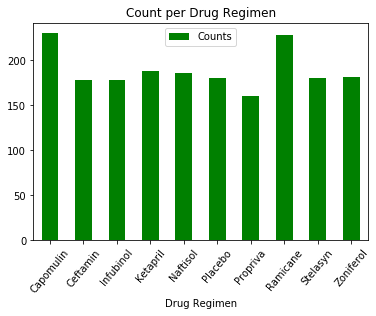

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

mice_timepoint_graph_df = merged_data_table.groupby("Drug Regimen")["Mouse ID"].count().reset_index()
mice_timepoint_graph_df


#mice_count_df = pd.DataFrame({'Drug Regimen':['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],
                            #'Number of Mice':[230,178,178,188,186,181,161,228,181,182]})

#ax = mice_count_df.plot.bar(x='Drug Regimen', y='Number of Mice', rot=30)

datapoints_df = mice_timepoint_graph_df.rename(columns={"Mouse ID": "Counts"})
bar_graph = datapoints_df.plot.bar(x='Drug Regimen', y='Counts', rot=50, color = 'green', title ='Count per Drug Regimen')


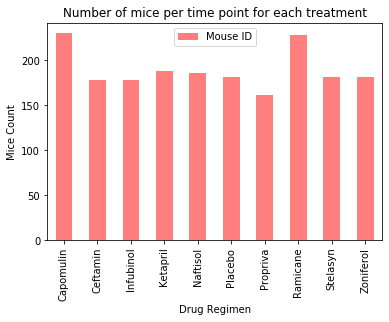

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import matplotlib.pyplot as plt

mice_timepoint_graph_df.plot(kind='bar', x="Drug Regimen", y="Mouse ID", color = 'red', title ='Count per Drug Regimen', alpha=0.5, align="center")
plt.title("Number of mice per time point for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.show()

## Pie Plots

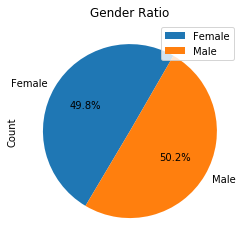

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_counts = pd.DataFrame((clean_data_df.groupby(["Sex"])["Age_months"].count())).reset_index()
gender_counts

gender_counts_df = gender_counts.rename(columns={"Age_months": "Count"})
gender_counts_df

pie_chart = gender_counts_df.plot.pie( y ="Count", labels=gender_counts_df["Sex"],autopct="%1.1f%%",
                                      title ="Gender Ratio", startangle=60)


Text(0.5, 1.0, 'Gender Ratio')

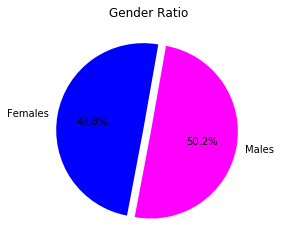

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_ratio = (clean_data_df.groupby(["Sex"])["Age_months"].count()).tolist()
gender_ratio

color = ["blue", "magenta"]
gender = ["Females", "Males"]

plt.pie(gender_ratio, labels=gender, colors=color,
        autopct="%1.1f%%", startangle=80, explode=(0.06,0.03))

plt.title("Gender Ratio")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

new_df = clean_data_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
new_df.head()




,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
31,309,b128,Capomulin,Female,9,22,45,38.982878,2
30,299,b742,Capomulin,Male,7,21,45,38.939633,0
6,64,f966,Capomulin,Male,16,17,20,30.485985,0
24,244,g288,Capomulin,Male,3,19,45,37.074024,1
37,360,g316,Capomulin,Female,22,22,45,40.159220,2


0     23.343598
1     28.430964
2     28.484033
3     30.485985
4     31.023923
5     31.896238
6     32.377357
7     33.329098
8     34.455298
9     36.041047
10    37.074024
11    37.311846
12    38.125164
13    38.753265
14    38.846876
15    38.939633
16    38.982878
17    39.952347
18    40.159220
19    40.658124
20    40.728578
21    41.483008
22    41.581521
23    46.539206
24    47.685963
Name: Tumor Volume (mm3), dtype: float64
******************************************
 Capomulin Regimen summary
******************************************
Lower quartile of tumor volume is: 32.37735684
Upper quartile of tumor volume is: 40.1592203
Interquartile range of tumor volume is: 7.78
Median of of tumor volume is: 38.125164399999996 
Values below 20.707356839999996 could be outliers
Values above 51.8292203 could be outliers

******************************************
     Capomulin Outlier Plot
******************************************


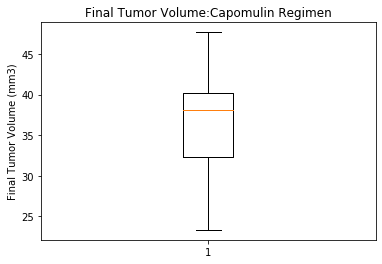

In [13]:
#Capomulin regimen and the quartiles


capomulin_df = new_df[new_df['Drug Regimen']=='Capomulin']
capomulin_df

sort_capo_tumor = capomulin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
sort_capo_tumor_vol = sort_capo_tumor["Tumor Volume (mm3)"]
print(sort_capo_tumor_vol)

print("******************************************")
print(" Capomulin Regimen summary")
print("******************************************")

quartiles = sort_capo_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round((upperq - lowerq),2)

print(f"Lower quartile of tumor volume is: {lowerq}")
print(f"Upper quartile of tumor volume is: {upperq}")
print(f"Interquartile range of tumor volume is: {iqr}")
print(f"Median of of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")
print("")
print("******************************************")
print("     Capomulin Outlier Plot")
print("******************************************")

#fig1, ax1 = plt.subplots()
plt.title('Final Tumor Volume:Capomulin Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(sort_capo_tumor_vol,showfliers=True)
plt.show()

0     22.050126
1     29.128472
2     30.276232
3     30.564625
4     30.638696
5     31.095335
6     31.560470
7     32.978522
8     33.397653
9     33.562402
10    36.134852
11    36.374510
12    36.561652
13    37.225650
14    37.311236
15    38.342008
16    38.407618
17    38.810366
18    40.659006
19    40.667713
20    43.047543
21    43.166373
22    43.419381
23    44.183451
24    45.220869
Name: Tumor Volume (mm3), dtype: float64
******************************************
  Ramicane Regimen summary    
******************************************
Lower quartile of tumor volume is: 31.56046955
Upper quartile of tumor volume is: 40.65900627
Interquartile range of tumor volume is: 9.1
Median of of tumor volume is: 36.56165229 
Values below 17.910469550000002 could be outliers
Values above 54.30900627 could be outliers

******************************************
     Ramicane Outlier Plot
******************************************


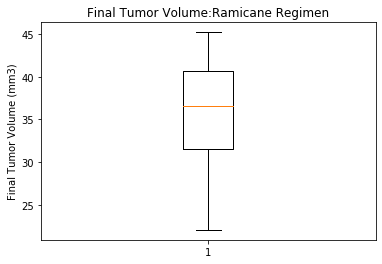

In [14]:
#Ramicane regimen and the quartiles

Ramicane_df = new_df[new_df['Drug Regimen']=='Ramicane']
Ramicane_df

sort_rami_tumor = Ramicane_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
sort_rami_tumor_vol = sort_rami_tumor["Tumor Volume (mm3)"]
print(sort_rami_tumor_vol)

print("******************************************")
print("  Ramicane Regimen summary    ")
print("******************************************")

quartiles = sort_rami_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round((upperq - lowerq),2)

print(f"Lower quartile of tumor volume is: {lowerq}")
print(f"Upper quartile of tumor volume is: {upperq}")
print(f"Interquartile range of tumor volume is: {iqr}")
print(f"Median of of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

print("")
print("******************************************")
print("     Ramicane Outlier Plot")
print("******************************************")

#fig2, ax2 = plt.subplots()
#ax2.set_title('Final Tumor Volume:Ramicane Regimen')
#ax2.set_ylabel('Final Tumor Volume (mm3)')
plt.boxplot(sort_rami_tumor_vol, showfliers=True)
plt.title('Final Tumor Volume:Ramicane Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

******************************************
 Infubinol Regimen summary
******************************************
Lower quartile of tumor volume is: 54.04860769
Upper quartile of tumor volume is: 65.52574285
Interquartile range of tumor volume is: 11.477135160000003
Median of of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers
Values above 82.74144559000001 could be outliers

******************************************
     Infubinol Outlier Plot
******************************************


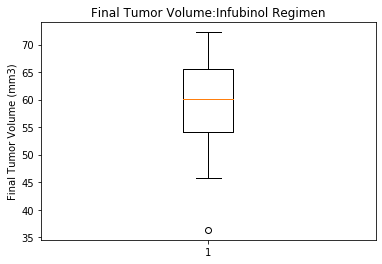

In [15]:
#Infubinol regimen and the quartiles


Infubinol_df = new_df[new_df['Drug Regimen']== "Infubinol"]

sort_infu_tumor = Infubinol_df.sort_values(["Tumor Volume (mm3)"], ascending=True)
sort_infu_tumor_vol = sort_infu_tumor["Tumor Volume (mm3)"]

print("******************************************")
print(" Infubinol Regimen summary")
print("******************************************")

quartiles = sort_infu_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = (upperq - lowerq)

print(f"Lower quartile of tumor volume is: {lowerq}")
print(f"Upper quartile of tumor volume is: {upperq}")
print(f"Interquartile range of tumor volume is: {iqr}")
print(f"Median of of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

print("")
print("******************************************")
print("     Infubinol Outlier Plot")
print("******************************************")

#fig3, ax3 = plt.subplots()
plt.title('Final Tumor Volume:Infubinol Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(sort_infu_tumor_vol)
plt.show()

0     45.000000
1     45.000000
2     45.000000
3     45.000000
4     46.784535
5     47.784682
6     48.722078
7     52.925348
8     55.742829
9     56.057749
10    57.918381
11    59.741901
12    59.851956
13    61.386660
14    61.433892
15    61.849023
16    62.999356
17    64.192341
18    64.299830
19    64.634949
20    64.729837
21    67.527482
22    67.748662
23    68.594745
24    68.923185
Name: Tumor Volume (mm3), dtype: float64
******************************************
 Ceftamin Regimen summary
******************************************
Lower quartile of tumor volume is: 48.72207785
Upper quartile of tumor volume is: 64.29983003
Interquartile range of tumor volume is: 15.58
Median of of tumor volume is: 59.85195552 
Values below 25.352077849999997 could be outliers
Values above 87.66983003 could be outliers

******************************************
     Ceftamin Outlier Plot
******************************************


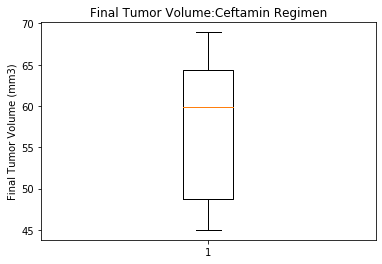

In [16]:
#Ceftamin regimen and the quartiles


Ceftamin_df = new_df[new_df['Drug Regimen'] == 'Ceftamin']
Ceftamin_df

sort_ceft_tumor = Ceftamin_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
sort_ceft_tumor_vol = sort_ceft_tumor["Tumor Volume (mm3)"]
print(sort_ceft_tumor_vol)

print("******************************************")
print(" Ceftamin Regimen summary")
print("******************************************")

quartiles = sort_ceft_tumor_vol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = round((upperq - lowerq),2)

print(f"Lower quartile of tumor volume is: {lowerq}")
print(f"Upper quartile of tumor volume is: {upperq}")
print(f"Interquartile range of tumor volume is: {iqr}")
print(f"Median of of tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

print("")
print("******************************************")
print("     Ceftamin Outlier Plot")
print("******************************************")

#fig4, ax4 = plt.subplots()
plt.title('Final Tumor Volume:Ceftamin Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.boxplot(sort_ceft_tumor_vol)
plt.show()

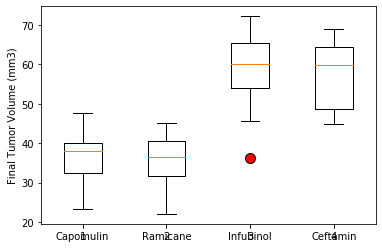

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


#data = [sort_capo_tumor_vol, sort_rami_tumor_vol, sort_infu_tumor_vol, sort_ceft_tumor_vol]
#fig5, ax5 = plt.subplots()

#bp = ax5.boxplot(data, meanline=True, showmeans=True, showcaps=True, 
           #showbox=True, showfliers=False)

data=[sort_capo_tumor_vol, sort_rami_tumor_vol, sort_infu_tumor_vol, sort_ceft_tumor_vol]

plt.xticks([1,2,3,4],["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
flierprops = dict(marker='o', markerfacecolor='r', markersize=10)
plt.boxplot(data, showfliers=True,flierprops=flierprops)
plt.show()


## Line and Scatter Plots

[]

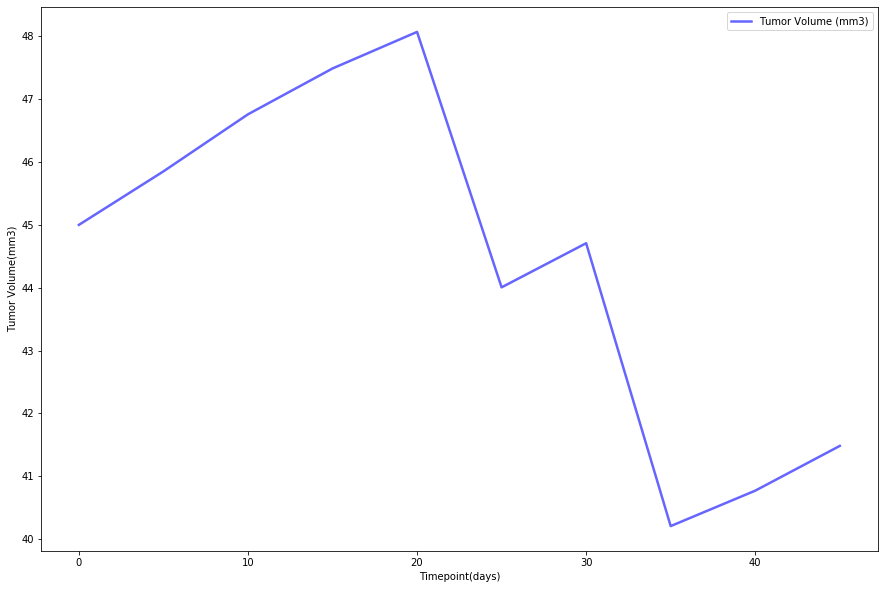

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data_capomulin_df = merged_data_table.loc[merged_data_table["Drug Regimen"] == "Capomulin"].reset_index()
#data_capomulin_df


# Selecting data of a single mouse from the above: mouse ID# l509
mouse_capo_df = data_capomulin_df.loc[data_capomulin_df["Mouse ID"] == "l509"].reset_index()
#mouse_capo_df

mouse_capo_df = mouse_capo_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
mouse_capo_df = mouse_capo_df.reset_index(drop=True)
mouse_capo_df

mouse_capo_df.set_index("Timepoint").plot(figsize=(15, 10), linewidth=2.5, color="blue", alpha = 0.6)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume(mm3)")
plt.plot()

In [19]:
data_capomulin_df
scatter_capo_df = data_capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_capo_df.head()



,Mouse ID,Weight (g),Tumor Volume (mm3)
0,s185,17,45.000000
1,s185,17,43.878496
2,s185,17,37.614948
3,s185,17,38.177232
4,s185,17,36.866876


[]

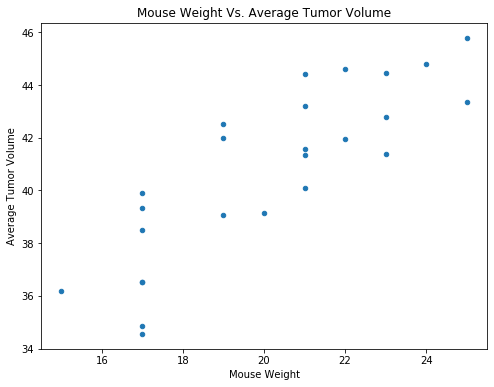

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

average_capo = pd.DataFrame(scatter_capo_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

average_capo_rename = average_capo.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume", "Weight (g)": "Mouse Weight"}).set_index('Mouse ID')
average_capo_rename.head()

average_capo_rename.plot(kind="scatter", x="Mouse Weight", y="Average Tumor Volume",  figsize=(8,6),title="Mouse Weight Vs. Average Tumor Volume")
plt.plot()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mice_weight = average_capo_rename.iloc[:,0]
average_tumor_volume = average_capo_rename.iloc[:,1]
correlation = st.pearsonr(mice_weight,average_tumor_volume)
print(f"The correlation between mice weight and their tumor volume is {round(correlation[0],2)}")

The correlation between mice weight and their tumor volume is 0.84


In [22]:
#linear regression model

from scipy import stats

x_values = average_capo_rename['Mouse Weight']
y_values = average_capo_rename['Average Tumor Volume']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regression = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

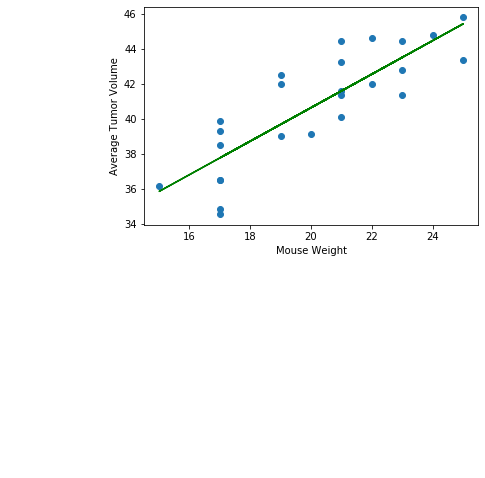

In [23]:
 # linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regression, color = "green")
plt.annotate(line_eq, (10,20), fontsize=6)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
